Time Taken (s): [0.08221287965774536, 0.0849967360496521, 0.06500787019729615, 0.07269687414169311, 0.07427948951721192]
CPU Usages (%): [100.0, 99.8, 82.9, 91.5, 99.8]


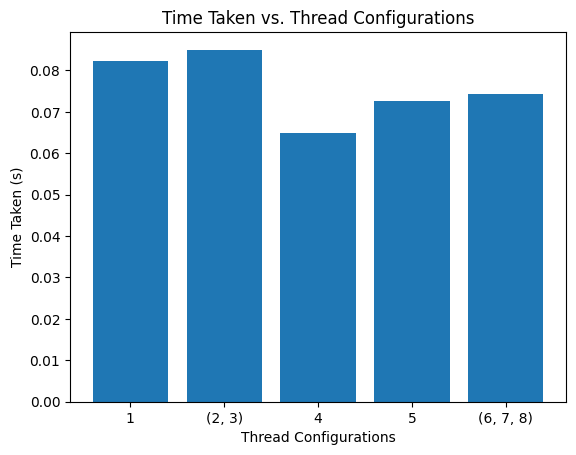

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil

def generate_random_matrices(num_matrices, size):
    matrices = []
    for _ in range(num_matrices):
        matrices.append(np.random.rand(size, size))
    return matrices

def generate_constant_matrix(size):
    return np.random.rand(size, size)

def multiply_matrices(matrices, constant_matrix):
    results = []
    for matrix in matrices:
        start_time = time.time()
        result = np.dot(matrix, constant_matrix)
        end_time = time.time()
        results.append((result, end_time - start_time))
    return results

def plot_graph(thread_configurations, times):
    thread_configurations_str = [str(config) for config in thread_configurations]
    plt.bar(thread_configurations_str, times)
    plt.xlabel('Thread Configurations')
    plt.ylabel('Time Taken (s)')
    plt.title('Time Taken vs. Thread Configurations')
    plt.show()

def record_cpu_usage():
    return psutil.cpu_percent()

def main():
    num_matrices = 100
    matrix_size = 1000
    thread_configurations = [1, (2, 3), 4, 5, (6, 7, 8)]
    times_taken = []
    cpu_usages = []

    constant_matrix = generate_constant_matrix(matrix_size)
    matrices = generate_random_matrices(num_matrices, matrix_size)

    for threads in thread_configurations:
        if isinstance(threads, int):
            threads = (threads,)
        psutil.cpu_percent()  # initial CPU usage
        results = multiply_matrices(matrices, constant_matrix)
        times = [result[1] for result in results]
        times_taken.append(sum(times) / len(times))
        cpu_usages.append(record_cpu_usage())

    print("Time Taken (s):", times_taken)
    print("CPU Usages (%):", cpu_usages)

    plot_graph(thread_configurations, times_taken)

if __name__ == "__main__":
    main()
